In [1]:
from linkml_runtime.utils.schemaview import SchemaView
from matplotlib import cm
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import json
import matplotlib.pyplot as plt
import os
import pandas as pd


These queries get data from only those rows with env_package values

```
% basex /Users/MAM/Documents/gitrepos/biosample-analysis/xqueries/get_harmonized-values_all_has_env_pack.xq > /Users/MAM/Documents/gitrepos/biosample-analysis/target/get_harmonized-values_all_has_env_pack.tsv

% basex /Users/MAM/Documents/gitrepos/biosample-analysis/xqueries/non-bsattribute-columns_has_env_pack.xq > /Users/MAM/Documents/gitrepos/biosample-analysis/target/non-bsattribute-columns_has_env_pack.tsv
```

In [2]:
biosample_query_results_root = "../../biosample-analysis/"

hn_long_file = "target/get_harmonized-values_all_has_env_pack.tsv"
hn_long_file = os.path.join(biosample_query_results_root, hn_long_file)

bs_non_attribute_file = "target/non-bsattribute-columns_has_env_pack.tsv"
bs_non_attribute_file = os.path.join(
    biosample_query_results_root, bs_non_attribute_file
)

env_package_mapping_file = "raw_env_package_mappings_only_20210927.tsv"

mixs_model_file = "../../mixs-source/model/schema/mixs.yaml"

# output

insdc_mixs_merged_file = "insdc_per_package_column_usage.tsv"
pca_plot_file = "insdc_per_package_column_usage.pdf"
pandas_profile_json_file = "insdc_per_package_column_usage_profile.json"
pandas_profile_html_file = "insdc_per_package_column_usage_profile.html"

# ---

which_tidied_package_column = 'alternative'

In [3]:
def get_mixs_slots_by_class(mixs_class):
    class_slots = list(
        mixs_package_slots["slot"].loc[mixs_package_slots["class"].eq(mixs_class)]
    )
    class_slots.sort()
    #     print(class_slots)
    return class_slots

In [4]:
mixs_view = SchemaView(mixs_model_file)

In [5]:
soil_subclasses = mixs_view.class_children("soil")

In [6]:
mixs_view.get_class("soil ME").is_a

'soil'

In [7]:
mixs_view.get_class("soil ME").mixins

['ME']

In [8]:
mixs_classes = mixs_view.all_classes()
mixs_classes_keys = mixs_classes.keys()

In [9]:
outer_list = []
for current_class in mixs_classes_keys:
    current_induceds = mixs_view.class_induced_slots(current_class)
    for i in current_induceds:
        outer_list.append([current_class, i.name, i.required, i.recommended])

mixs_package_slots = pd.DataFrame(outer_list)
mixs_package_slots.columns = ["class", "slot", "required", "recommended"]
# mixs_package_slots.to_clipboard(index=False)
mixs_package_slots.to_csv(insdc_mixs_merged_file, sep="\t", index=False)

---

In [10]:
env_package_mapping = pd.read_csv(env_package_mapping_file, sep="\t")
env_package_mapping

,raw_env_package,env_package,alternative
0,air,air,air
1,MIGS/MIMS/MIMARKS.air,air,air
2,built environment,built,built environment
3,built,built,built environment
4,host-associated,host-associated,host-associated
...,...,...,...
97,MIGS/MIMS/MIMARKS.air|||MIGS/MIMS/MIMARKS.micr...,NaN,NaN
98,ENVO:00000016,NaN,NaN
99,MIMARKS_16S,NaN,NaN
100,not applicable,NaN,NaN


In [11]:
bs_non_attribute = pd.read_csv(bs_non_attribute_file, sep="\t")

In [12]:
bs_non_attribute.shape

(250815, 15)

In [13]:
bs_non_attribute

,id,accession,primary_id,title,dna_source,doi,entrez_links,model,package,package_name,status,status_date,taxonomy_id,taxonomy_name,paragraph
0,25530,SAMEA1706070,SAMEA1706070,freshwater metagenome,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2015-08-07T13:22:21,449393,freshwater metagenome,Neuston of Lake Llebreta
1,25531,SAMEA1706069,SAMEA1706069,freshwater metagenome,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2015-08-07T13:22:21,449393,freshwater metagenome,1 m depth of Lake Llebreta
2,25532,SAMEA1706067,SAMEA1706067,freshwater metagenome,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2015-08-07T13:22:21,449393,freshwater metagenome,Neuston of Lake Llebreta
3,25533,SAMEA1706066,SAMEA1706066,freshwater metagenome,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2015-08-07T13:22:21,449393,freshwater metagenome,1 m depth of Lake Llebreta
4,25534,SAMEA1706068,SAMEA1706068,freshwater metagenome,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2015-08-07T13:22:21,449393,freshwater metagenome,Neuston of Lake Llebreta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250810,21289891,SAMEA9831465,SAMEA9831465,12159.THS2.DREADD9.Post1; Activation of TH and...,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2021-09-07T10:27:53.038,410661,mouse gut metagenome,Post-injection D1- fecal pellet
250811,21289892,SAMEA9831466,SAMEA9831466,12159.THS2.DREADD9.Post5; Activation of TH and...,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2021-09-07T10:27:53.059,410661,mouse gut metagenome,Post-injection D5- fecal pellet
250812,21289893,SAMEA9831467,SAMEA9831467,Activation of TH and ChAT Neurons by DREADDs E...,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2021-09-07T10:27:53.079,410661,mouse gut metagenome,Post-injection D9- fecal pellet
250813,21289894,SAMEA9831468,SAMEA9831468,Activation of TH and ChAT Neurons by DREADDs E...,NaN,NaN,NaN,Generic,Generic.1.0,Generic,live,2021-09-07T10:27:53.099,410661,mouse gut metagenome,Pre-injection D1- fecal pellet


In [14]:
hn_long = pd.read_csv(hn_long_file, sep="\t")

In [15]:
hn_long.shape

(3963432, 3)

In [16]:
# 12 sec for 3963432 rows
hn_wide = hn_long.pivot(index="id", columns="attribute", values="value")

In [17]:
hn_wide

attribute,age,agrochem_addition,air_temp,air_temp_regm,al_sat,al_sat_meth,alkalinity,altitude,ammonium,annual_season_precpt,...,variety,ventilation_type,wastewater_type,water_content,water_content_soil,water_content_soil_meth,water_current,watering_regm,wind_direction,wind_speed
id,,,,,,,,,,,,,,,,,,,,,
25530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700670111,42.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700670111,42.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,61.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21289891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21289892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21289893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
env_package_mapping

,raw_env_package,env_package,alternative
0,air,air,air
1,MIGS/MIMS/MIMARKS.air,air,air
2,built environment,built,built environment
3,built,built,built environment
4,host-associated,host-associated,host-associated
...,...,...,...
97,MIGS/MIMS/MIMARKS.air|||MIGS/MIMS/MIMARKS.micr...,NaN,NaN
98,ENVO:00000016,NaN,NaN
99,MIMARKS_16S,NaN,NaN
100,not applicable,NaN,NaN


In [19]:
hn_wide = hn_wide.merge(
    env_package_mapping,
    how="left",
    left_on="env_package",
    right_on="raw_env_package",
    suffixes=["_original", "_mapped"],
)

In [20]:
# hn_wide[["raw_env_package", which_tidied_package_column]]

In [21]:
column_na_fraction = hn_wide.groupby(which_tidied_package_column).apply(lambda x: x.notnull().mean())
column_na_fraction

,age,agrochem_addition,air_temp,air_temp_regm,al_sat,al_sat_meth,alkalinity,altitude,ammonium,annual_season_precpt,...,water_content,water_content_soil,water_content_soil_meth,water_current,watering_regm,wind_direction,wind_speed,raw_env_package,env_package_mapped,alternative
alternative,,,,,,,,,,,,,,,,,,,,,
air,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.466970,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018223,0.034169,1.0,1.0,1.0
built environment,0.060753,0.00000,0.004178,0.000000,0.000000,0.000000,0.000000,0.000205,0.062877,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
host-associated,0.166557,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163275,0.000000,0.000013,...,0.000000,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
human-gut,0.169663,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066561,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
human-oral,0.158244,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026759,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
human-skin,0.324530,0.00000,0.001916,0.000000,0.000000,0.000000,0.000000,0.017448,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
human-vaginal,0.050712,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034698,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
microbial mat_biofilm,0.000000,0.00000,0.000658,0.000000,0.000000,0.000000,0.031589,0.044093,0.000000,0.000000,...,0.031589,0.011846,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0
miscellaneous natural or artificial environment,0.008209,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102126,0.000000,0.000000,...,0.000000,0.000123,0.000123,0.000245,0.000000,0.000000,0.000000,1.0,1.0,1.0


In [22]:
column_na_fraction_packages = set(column_na_fraction.index)
mixs_package_slots_classes = set(mixs_package_slots["class"])

not_again = column_na_fraction_packages - mixs_package_slots_classes

not_again

# was:
# {'built', 'microbial mat/biofilm', 'miscellaneous', 'wastewater/sludge'}

# mixs_package_slots_classes
# 'built environment',
# 'microbial mat_biofilm',
# 'miscellaneous natural or artificial environment',
# 'wastewater_sludge',

set()

In [23]:
mixs_for_merge = mixs_package_slots.loc[
    mixs_package_slots["class"].isin(column_na_fraction_packages)
]

In [24]:
mixs_for_merge["associated"] = True

/var/folders/vt/f297tpjn6n1b6dwkcwhhnmxm0000gp/T/ipykernel_61138/1066536151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mixs_for_merge["associated"] = True


In [25]:
all_defined_slots = list(set(mixs_for_merge["slot"]))

In [26]:
insdc_for_merge = column_na_fraction.copy()
insdc_for_merge["package"] = insdc_for_merge.index
insdc_for_merge.drop(
    labels=[
        which_tidied_package_column,
        "env_package_mapped",
        "env_package_original",
        "raw_env_package",
    ],
    inplace=True,
    axis=1,
)
insdc_for_merge = pd.melt(insdc_for_merge, id_vars="package")
insdc_for_merge.columns = ["class", "slot", "usage"]

In [27]:
insdc_mixs_merged = insdc_for_merge.merge(
    mixs_for_merge, how="outer", on=["slot", "class"]
)

insdc_mixs_merged.drop(
    labels=[
        "recommended",
    ],
    inplace=True,
    axis=1,
)

insdc_mixs_merged["mixs_defined"] = insdc_mixs_merged["slot"].isin(all_defined_slots)

insdc_mixs_merged.sort_values(by=["class", "slot"], inplace=True)

insdc_mixs_merged["usage"] = insdc_mixs_merged["usage"].fillna(0)
insdc_mixs_merged["required"] = insdc_mixs_merged["required"].fillna(False)
insdc_mixs_merged["associated"] = insdc_mixs_merged["associated"].fillna(False)

insdc_mixs_merged = insdc_mixs_merged.loc[
    ~(~insdc_mixs_merged["associated"] & insdc_mixs_merged["usage"].eq(0))
]

In [28]:
insdc_mixs_merged

,class,slot,usage,required,associated,mixs_defined
4415,air,alt,0.000000,True,True,True
98,air,altitude,0.466970,False,False,False
4416,air,barometric_press,0.000000,False,True,True
280,air,body_habitat,0.002278,False,False,False
308,air,body_product,0.002278,False,False,False
...,...,...,...,...,...,...
3933,water,treatment,0.010300,False,False,False
3947,water,trophic_level,0.000653,False,False,False
3961,water,turbidity,0.004221,False,True,True
4073,water,water_current,0.000000,False,True,True


In [29]:
insdc_mixs_merged.to_csv(insdc_mixs_merged_file, sep="\t", index=False)

----

## PCA on INSDC slot usage by package alone

Could slot usage help classify samples with no `env_package` annotation?

In [30]:
scaled = StandardScaler().fit_transform(column_na_fraction)

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(
    data=principalComponents, columns=["principal component 1", "principal component 2"]
)
principalDf.index = column_na_fraction.index
principalDf

,principal component 1,principal component 2
alternative,,
air,-0.859739,0.547959
built environment,-1.931728,0.102143
host-associated,-7.387143,-6.676377
human-gut,-6.103909,-5.244542
human-oral,-4.836190,-4.046849
human-skin,-4.999585,-4.717088
human-vaginal,-4.434745,-3.846849
microbial mat_biofilm,2.827510,8.814809
miscellaneous natural or artificial environment,-1.844145,0.015033


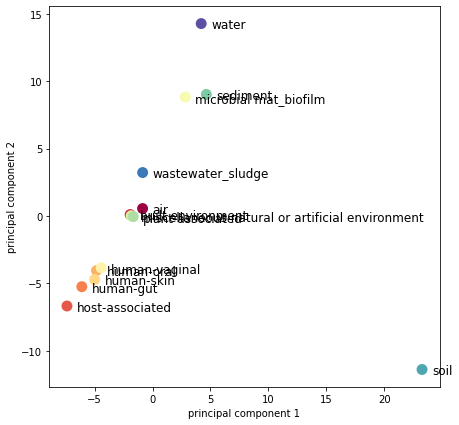

In [32]:
plt.rcParams["figure.figsize"] = [7, 7]

cmap = cm.get_cmap("Spectral")
fig, ax3 = plt.subplots()
principalDf.plot(
    "principal component 1",
    "principal component 2",
    kind="scatter",
    ax=ax3,
    s=120,
    linewidth=0,
    c=range(len(principalDf)),
    colormap=cmap,
)

for k, v in principalDf.iterrows():
    ax3.annotate(
        k,
        v,
        xytext=(10, -5),
        textcoords="offset points",
        family="sans-serif",
        fontsize=12,
        #         color="darkslategrey",
        color="black",
    )

plt.savefig(pca_plot_file)

----

## INSDC values ProfileReport
- inline widgets
- saved HTML file
- saved JSON file

In [33]:
profile = ProfileReport(
    hn_wide, title="Pandas Profiling Report", minimal=True, vars={"cat": {"n_obs": 20}}
)

In [34]:
a = profile.to_json()
textfile = open(pandas_profile_json_file, "w")
textfile.write(a)
textfile.close()

Summarize dataset:   0%|          | 0/306 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
# profile.to_widgets()

In [36]:
profile.to_file(pandas_profile_html_file)

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]